#  Predicting tomorrow rainfall

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading CSV File

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\IN Progress\Rainfall\weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### PREPROCESSING

In [3]:
df.columns.tolist()        #columns list

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [4]:
df = df.drop(['Date', 'Location', 'Sunshine', 'Evaporation','Rainfall'],axis = 1) #dropping unnecessary columns
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Replacing Categorical data to Numerical values (Encoding through Mapping) 

In [5]:
#### For WindGustDir



print (df['WindGustDir'].describe())
print (df['WindGustDir'].unique())
df['WindGustDir'] = df['WindGustDir'].fillna('W')   # replacing with top value to avoid nan values in the specific column
wind1 = {'W' : 1, 'WNW' : 2, 'WSW' : 3, 'NE' : 4, 'NNW' : 5, 'N' : 6, 'NNE' :7, 'SW' : 8, 'ENE' : 9, 'SSE' : 10,
       'S' : 11, 'NW' : 12, 'SE' : 13, 'ESE': 14, 'E' : 15, 'SSW' : 16}
df['WindGustDir'] = df['WindGustDir'].map(wind1)
print(df['WindGustDir'].dtypes)
df                                                        # creating dictionary function and mapping


count     135134
unique        16
top            W
freq        9915
Name: WindGustDir, dtype: object
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
int64


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,2,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,3,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,4,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,5,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,6,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,13,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
######### WindDir9am ###################



print (df['WindDir9am'].unique())
print(df['WindDir9am'].describe())
df['WindDir9am']= df['WindDir9am'].fillna('N')
wind2 = {'W' : 1, 'NNW' : 2, 'SE' : 3, 'ENE' : 4, 'SW' : 5, 'SSE' : 6, 'S' : 7, 'NE' : 8, 'N' : 9, 'SSW' : 10, 'WSW' :11,
       'ESE' : 12, 'E' : 13, 'NW' : 14, 'WNW' : 15, 'NNE' : 16}
df['WindDir9am'] = df['WindDir9am'].map(wind2)
print()
print(df['WindDir9am'].dtypes)
df                                                        # creating dictionary function and mapping

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
count     134894
unique        16
top            N
freq       11758
Name: WindDir9am, dtype: object

int64


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,1,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,2,44.0,2,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,3,46.0,1,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,4,24.0,3,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1,41.0,4,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,3,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,5,22.0,3,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,6,37.0,3,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,13,28.0,6,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
######### WindDir3pm




print (df['WindDir3pm'].unique())
print (df['WindDir3pm'].describe())
df['WindDir3pm']= df['WindDir3pm'].fillna('SE')  #replacing NaN value with top value

wind3 = {'WNW' :1, 'WSW':2, 'E':3, 'NW':4 , 'W': 5 , 'SSE':6 , 'ESE':7 , 'ENE':8 , 'NNW':9, 'SSW':10,
       'SW' : 11, 'SE' : 12, 'N':13 , 'S': 14, 'NNE' : 15, 'NE' : 16}
df['WindDir3pm'] = df['WindDir3pm'].map(wind3)
df['WindDir3pm']= df['WindDir3pm'].astype(int)
print()
print(df['WindDir3pm'].dtypes)
df                                                        # creating dictionary function and mapping

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
count     141232
unique        16
top           SE
freq       10838
Name: WindDir3pm, dtype: object

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
#########  Rain Today



print (df['RainToday'].unique())
print(df['RainToday'].describe())
df['RainToday']= df['RainToday'].fillna('No')  #replacing NaN value with top value   
print()
print(df['RainToday'].unique())
rToday = {'No':0 ,'Yes' : 1}
df['RainToday']= df['RainToday'].map(rToday)
df['RainToday']= df['RainToday'].astype(int)
print()
print(df['RainToday'].dtypes)
df

['No' 'Yes' nan]
count     142199
unique         2
top           No
freq      110319
Name: RainToday, dtype: object

['No' 'Yes']

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,No
1,7.4,25.1,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,No
2,12.9,25.7,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,No
3,9.2,28.0,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,No
4,17.5,32.3,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,No
145456,3.6,25.3,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,No
145457,5.4,26.9,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,No
145458,7.8,27.0,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,No


In [9]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,No
1,7.4,25.1,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,No
2,12.9,25.7,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,No
3,9.2,28.0,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,No
4,17.5,32.3,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,No
145456,3.6,25.3,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,No
145457,5.4,26.9,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,No
145458,7.8,27.0,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,No


In [10]:
###########  RainTomorrow



print (df['RainTomorrow'].unique())
print(df['RainTomorrow'].describe())
df['RainTomorrow']= df['RainTomorrow'].fillna('No')  #replacing NaN value with top value
print()
print(df['RainTomorrow'].unique())
rToday = {'No':0 ,'Yes' : 1}
df['RainTomorrow']= df['RainTomorrow'].map(rToday)
df['RainTomorrow']= df['RainTomorrow'].astype(int)
print()
print(df['RainTomorrow'].dtypes)
df


['No' 'Yes' nan]
count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

['No' 'Yes']

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44.0,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44.0,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46.0,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24.0,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41.0,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31.0,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22.0,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37.0,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28.0,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


# NaN values to Numeric Value

In [11]:
############ WindGustSpeed



print (df['WindGustSpeed'].unique())
df['WindGustSpeed']= df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())  #replacing NaN value with mean
df['WindGustSpeed'] = df['WindGustSpeed'].astype(int)
print(df['WindGustSpeed'].unique())
print(df['WindGustSpeed'].dtypes)
df

[ 44.  46.  24.  41.  56.  50.  35.  80.  28.  30.  31.  61.  nan  22.
  63.  43.  26.  33.  57.  48.  39.  37.  52.  98.  54.  83.  59.  70.
  69.  17.  20.  19.  15.  13.  11.  72.  85.  65.  78. 107.  74.  67.
  94.  76.  81.  87.   9.   7.  89.  91.  93. 102. 100. 113. 117.  96.
 111. 106. 135. 104. 120. 115. 126. 109. 122. 124. 130.   6.]
[ 44  46  24  41  56  50  35  80  28  30  31  61  40  22  63  43  26  33
  57  48  39  37  52  98  54  83  59  70  69  17  20  19  15  13  11  72
  85  65  78 107  74  67  94  76  81  87   9   7  89  91  93 102 100 113
 117  96 111 106 135 104 120 115 126 109 122 124 130   6]
int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [12]:
######## WindSpeed9am



print (df['WindSpeed9am'].unique())
print (df['WindSpeed9am'].describe())
df['WindSpeed9am']= df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean()) 
df['WindSpeed9am']= df['WindSpeed9am'].astype(int)
print()
print(df['WindSpeed9am'].dtypes) 
df  

[ 20.   4.  19.  11.   7.   6.  15.  17.  28.  24.  nan   9.   0.  13.
   2.  26.  30.  22.  35.  37.  31.  33.  48.  39.  44.  43.  41.  46.
  56.  83.  74.  52.  65.  50. 130.  54.  61.  57.  59.  87.  67.  63.
  69.  72.]
count    143693.000000
mean         14.043426
std           8.915375
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [13]:
################ WindSpeed3pm


print (df['WindSpeed3pm'].unique())
print (df['WindSpeed3pm'].describe())
df['WindSpeed3pm']= df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())  #replacing NaN value with mean 
df['WindSpeed3pm']= df['WindSpeed3pm'].astype(int)
print()
print(df['WindSpeed3pm'].dtypes)
df

[24. 22. 26.  9. 20. 17. 28. 11.  6. 13. 30. 19. 31.  7. 15. 48.  4. 33.
  0.  2. nan 37. 46. 39. 50. 35. 44. 41. 43. 56. 61. 54. 52. 83. 65. 78.
 57. 63. 59. 74. 72. 69. 76. 87. 67.]
count    142398.000000
mean         18.662657
std           8.809800
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [14]:
############ Humidity9am



print (df['Humidity9am'].unique())
print (df['Humidity9am'].describe())
print()
df['Humidity9am']= df['Humidity9am'].fillna(df['Humidity9am'].mean())  #replacing NaN value with mean
df['Humidity9am']= df['Humidity9am'].astype(int)
print (df['Humidity9am'].unique())
print()
print(df['WindSpeed9am'].dtypes)
df


[ 71.  44.  38.  45.  82.  55.  49.  48.  42.  58.  89.  76.  65.  57.
  50.  69.  80.  47.  56.  54.  41.  78.  46.  43.  33.  34.  36.  52.
  51.  40.  35.  39.  60.  37.  27.  32.  53.  20.  66.  63.  62.  87.
  61.  59.  92.  72.  67.  75.  88.  68.  73.  74.  83.  77.  70.  81.
  86.  97.  99.  91.  85.  93.  84.  94.  79.  98.  96.  95.  90.  64.
  29.  21. 100.  nan  24.  25.  31.  18.  23.  26.  28.  30.  19.  22.
  17.  15.   9.  12.  13.  16.   6.  10.  14.  11.   7.   8.   5.   3.
   2.   4.   0.   1.]
count    142806.000000
mean         68.880831
std          19.029164
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

[ 71  44  38  45  82  55  49  48  42  58  89  76  65  57  50  69  80  47
  56  54  41  78  46  43  33  34  36  52  51  40  35  39  60  37  27  32
  53  20  66  63  62  87  61  59  92  72  67  75  88  68  73  74  83  77
  70  81  86  97  99  91  85  93  84  94  7

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [15]:
############ Humidity3pm 


print (df['Humidity3pm'].unique())
print (df['Humidity3pm'].describe())
df['Humidity3pm']= df['Humidity3pm'].fillna(df['Humidity3pm'].mean())  #replacing NaN value with mean
df['Humidity3pm']= df['Humidity3pm'].astype(int)
print()
print(df['Humidity3pm'].unique())
print()
print(df['Humidity3pm'].dtypes)

[ 22.  25.  30.  16.  33.  23.  19.   9.  27.  91.  93.  43.  32.  28.
  82.  65.  26.  24.  17.  15.  70.  12.   8.  31.  20.  10.  21.  39.
  13.  11.  69.  18.  14.  35.  90.  68.  74.  41.  34.  78.  49.  37.
  42.  47.  52.  29.  86.  89.  62.  79.  48.  46.  38.  44.  51.  36.
  45.  40.  53.  61.  59.  63.  54.  57.  50.  58.  75.  97.  80.  95.
  56.  72.  60.  71.  73.  81.  76.  64.  87.  85.  67.  55.  77.  84.
   7.  99.  92.  66.  83.  94.  96.  88.  nan 100.  98.   5.   6.   1.
   4.   2.   3.   0.]
count    140953.000000
mean         51.539116
std          20.795902
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64

[ 22  25  30  16  33  23  19   9  27  91  93  43  32  28  82  65  26  24
  17  15  70  12   8  31  20  10  21  39  13  11  69  18  14  35  90  68
  74  41  34  78  49  37  42  47  52  29  86  89  62  79  48  46  38  44
  51  36  45  40  53  61  59  63  54  57  5

In [16]:
###########  Pressure9am  


print (df['Pressure9am'].unique())
print (df['Pressure9am'].describe())
df['Pressure9am']= df['Pressure9am'].fillna(df['Pressure9am'].mean() ) #replacing NaN value with mean
df['Pressure9am']= df['Pressure9am'].astype(int)
print()
print(df['Pressure9am'].dtypes)
df


[1007.7 1010.6 1007.6 1017.6 1010.8 1009.2 1009.6 1013.4 1008.9 1007.
 1011.8 1010.5  994.3 1001.2 1009.7 1012.2 1005.8 1009.4 1019.2 1019.3
 1013.6 1007.8 1011.  1012.9 1010.9 1006.8 1005.2 1004.8 1005.6 1006.1
 1004.5 1014.4 1018.7 1015.1 1012.6 1011.9 1017.8 1009.9 1014.1 1015.7
 1011.6 1008.4 1019.7 1015.8 1010.1 1005.3 1007.9 1005.4 1016.5 1017.7
 1014.9 1014.6 1014.2 1012.5 1011.7 1008.8 1005.9 1008.  1008.2 1009.3
 1012.8 1017.  1023.3 1022.5 1016.2 1017.2 1012.4 1015.6 1013.  1014.
 1016.6 1007.5 1014.7 1014.5 1013.7 1015.2 1019.5 1021.3 1017.4 1012.7
 1013.3 1016.3 1014.8 1019.1 1023.  1023.8 1022.4 1023.2 1022.6 1018.8
 1019.8 1020.4 1021.8 1026.7 1027.1 1024.2 1021.5 1024.4 1024.1 1018.5
 1022.8 1022.7 1023.6 1025.2 1026.  1004.  1013.8 1018.  1023.1 1023.4
 1026.9 1028.7 1029.8 1031.4 1028.5 1026.2 1028.8 1025.1 1025.6 1022.3
 1018.4 1015.3 1015.  1024.7 1022.2 1025.  1024.6 1021.4 1021.7 1030.3
 1034.1 1031.9 1029.3 1023.5 1021.  1017.9 1011.1 1025.7 1018.3 1013.9
 1029.7 

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007.1,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007.8,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008.7,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012.8,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019.1,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016.8,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016.5,3.0,2.0,15.1,26.0,0,0


In [17]:
########### Pressure3pm 


print (df['Pressure3pm'].unique())
print (df['Pressure3pm'].describe())
df['Pressure3pm']= df['Pressure3pm'].fillna(df['Pressure3pm'].mean())  #replacing NaN value with 0
df['Pressure3pm']= df['Pressure3pm'].astype(int)
print()
print(df['Pressure3pm'].dtypes)
df

[1007.1   1007.8   1008.7   1012.8   1006.    1005.4   1008.2   1010.1
 1003.6   1005.7   1004.2    993.    1001.8   1010.3   1010.4   1002.2
 1009.7   1017.1   1014.8   1008.1   1007.6   1001.7   1003.4   1005.1
 1003.2   1013.1   1009.2   1006.7   1002.7   1010.9   1013.7   1006.8
 1012.1   1006.9   1012.7   1017.4   1016.2   1010.6   1004.8   1005.9
  997.8   1003.9   1014.6   1014.1   1011.6   1011.8   1010.2   1010.5
 1007.4   1004.7   1002.6   1005.    1003.8   1006.5   1008.5   1011.1
 1017.3   1019.7   1016.4   1013.8   1013.5   1007.5   1004.5   1010.8
 1012.4   1013.4   1015.    1012.6   1004.6   1009.    1012.    1014.7
 1015.9   1018.    1018.9   1008.    1013.2   1013.9   1013.6   1014.4
 1019.2   1017.2   1020.7   1020.6   1019.1   1019.5   1019.4   1018.4
 1012.9   1019.3   1016.5   1019.6   1023.5   1023.4   1017.7   1020.3
 1020.8   1018.7   1009.8   1016.8   1020.    1020.9   1021.6   1015.7
 1002.4   1000.9   1003.3   1018.3   1021.5   1023.2   1024.    1025.9
 1027.

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007,8.0,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007,NaN,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008,NaN,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012,NaN,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020,NaN,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019,NaN,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016,NaN,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016,3.0,2.0,15.1,26.0,0,0


In [18]:
###########  Cloud9am 


print (df['Cloud9am'].unique())
print (df['Cloud9am'].describe())
df['Cloud9am']= df['Cloud9am'].fillna(df['Cloud9am'].mean())  #replacing NaN value with 0
df['Cloud9am']= df['Cloud9am'].astype(int)
print()
print(df['Cloud9am'].dtypes)
df

[ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.  9.]
count    89572.000000
mean         4.447461
std          2.887159
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007,8,NaN,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007,4,NaN,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008,4,2.0,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012,4,NaN,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006,7,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020,4,NaN,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019,4,NaN,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016,4,NaN,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016,3,2.0,15.1,26.0,0,0


In [19]:
#########  Cloud3pm 



print (df['Cloud3pm'].unique())
print (df['Cloud3pm'].describe())
df['Cloud3pm']= df['Cloud3pm'].fillna(df['Cloud3pm'].mean())  #replacing NaN value with mean value
df['Cloud3pm']= df['Cloud3pm'].astype(int)
print()
print(df['Cloud3pm'].dtypes)
df

[nan  2.  8.  7.  1.  5.  4.  6.  3.  0.  9.]
count    86102.000000
mean         4.509930
std          2.720357
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud3pm, dtype: float64

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007,8,4,16.9,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007,4,4,17.2,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008,4,2,21.0,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012,4,4,18.1,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006,7,8,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020,4,4,10.1,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019,4,4,10.9,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016,4,4,12.5,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016,3,2,15.1,26.0,0,0


In [20]:
##########  Temp9am 


print (df['Temp9am'].unique())
print (df['Temp9am'].describe())
df['Temp9am']= df['Temp9am'].fillna(df['Temp9am'].mean())  #replacing NaN value with mean value
df['Temp9am']= df['Temp9am'].astype(int)
print()
print(df['Temp9am'].dtypes)
df



[16.9 17.2 21.  18.1 17.8 20.6 16.3 18.3 20.1 20.4 15.9 17.4 15.8 17.3
 18.  15.5 19.1 24.5 23.8 20.9 21.5 23.2 26.6 24.6 21.6 12.5 19.7 14.9
 17.1 20.7 22.4 23.1 25.2 17.9 20.2 22.8 24.2 24.3 25.6 27.6 16.  22.
 26.8 27.3 26.1 23.3 21.2 23.4 25.8 28.2 29.  29.2 29.9 32.4 28.8 27.2
 25.5 26.5 28.7 29.6 34.5 18.7 16.7 17.  19.2 21.4 22.1 19.3 15.  20.
 22.2 23.  15.6 13.9 12.6 13.3 17.6 18.6 19.  19.9 12.7 12.2 12.1 14.7
 18.8 15.4 16.2 16.5 14.  16.6 18.4 12.9 13.8 15.1 16.4 16.1 20.5  9.6
 12.4 14.1 11.2  9.5  7.6 10.1  8.2  7.9  7.2 10.6 10.3 10.   8.3 11.
  9.4 11.7  8.5  9.1  7.5 13.   7.   8.8  7.4 11.9 11.6 13.6  7.1 10.2
  8.   9.2 11.3  4.7  6.8  4.9  2.2  1.9  5.9  6.5  5.4  6.6  5.6  6.9
  8.4  9.8 13.5  7.8  2.3  2.4  3.3  3.8  4.8  8.1  9.   4.5  3.2  3.7
  2.5  4.4  4.2  9.3  8.9 10.5  9.9  5.7  2.  14.8  6.7  6.   5.5 11.1
  5.8 10.8 13.2  7.7  9.7  8.6  8.7 10.9 14.3 11.5 13.1 15.2 11.8 13.4
 14.4 23.9 17.5 24.7 21.7 24.1 19.5 27.8 16.8 20.3 18.9 15.7 12.8 21.8
 20.8 32.

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21.8,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24.3,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23.2,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26.5,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22.4,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24.5,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26.1,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26.0,0,0


In [21]:
##########  Temp3pm 



print (df['Temp3pm'].unique())
print (df['Temp3pm'].describe())
df['Temp3pm']= df['Temp3pm'].fillna('0')  #replacing NaN value with 0
df['Temp3pm']= df['Temp3pm'].astype(int)
print()
print(df['Temp3pm'].dtypes)
df

[21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 28.8 17.  15.8 19.8
 23.5 26.2 18.1 21.5 21.  27.3 31.6 30.8 29.  31.2 33.  32.1 26.1 18.2
 22.7 25.7 22.1 33.9 34.4 36.8 38.4 27.6 26.6 29.3 30.  33.2 35.7 41.5
 27.1 25.8 30.5 37.7 36.1 33.1 36.5 36.2 39.2 40.1 41.2 42.  41.9 37.1
 35.2 39.7 41.6 43.4 38.5 29.4 24.9 17.3 28.5 29.2 29.5 27.  30.7 32.7
 26.8 29.8 31.3 33.4 28.6 33.6 28.1 21.9 21.4 22.  29.6 18.8 23.8 19.7
 18.3 20.5 23.9 27.2 32.6 33.5 31.4 19.6 27.7 29.9 30.9 27.4 20.3 21.2
 20.9 21.6 25.  24.4 23.1 18.9 19.4 22.9 23.6 21.3 22.3 22.6 15.1 14.5
 11.6  9.4 14.  12.1 16.1 16.3 19.1 18.5 18.4 19.2 20.2 17.7 18.  14.6
 15.3 15.9 14.7 18.7 21.7 20.8 19.5 17.4 15.6 16.7 16.8 13.4 13.  16.5
 10.2 11.5 11.4  7.9  9.7  8.8 15.5 13.9 15.4 14.9 16.4 13.6 15.2 13.7
 11.3 12.3 13.1 11.7 12.6 12.  12.4 14.3 13.2 10.1 12.5 12.8 14.2 11.2
 13.5 17.6 12.9 10.8  9.6  7.3 12.7 13.3 16.6 11.1 14.4 16.2 17.5 10.7
 16.  24.  17.1 20.7 17.2 20.6 14.8 10.  15.7 17.8 19.  14.1 10.9 19.3
 25.3 

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7.4,25.1,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12.9,25.7,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9.2,28.0,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17.5,32.3,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3.6,25.3,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5.4,26.9,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7.8,27.0,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


In [22]:
#########  MaxTemp  



df['MaxTemp'] = df['MaxTemp'].fillna((df['MaxTemp'].mean()))
df['MaxTemp']= df['MaxTemp'].astype(int)
print (df['MaxTemp'].unique())
print()
print(df['MaxTemp'].dtypes)
df

[22 25 28 32 29 26 31 30 21 18 24 27 20 33 23 34 35 37 38 43 36 39 40 41
 42 44 19 16 15 12 11 14 17 13 10  8  9  6  7 45 46 47  4  2 -1  0  5  3
 -2  1 -3 -4 48]

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7.4,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12.9,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9.2,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17.5,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3.6,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5.4,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7.8,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


In [23]:
############### MinTemp  


df['MinTemp'] = df['MinTemp'].fillna((df['MinTemp'].mean()))
df['MinTemp']= df['MinTemp'].astype(int)
print (df['MinTemp'].unique())
print()
print(df['MinTemp'].dtypes)
df

[13  7 12  9 17 14 15  8 11 20 16 19 10 18 24 21 22 28 23  3  6  5  4  2
  1 -2 -1  0 25 26 -3 27 29 -4 -5 -6 -8 -7 30 31 33]

int32


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


In [24]:
df.columns.tolist()

['MinTemp',
 'MaxTemp',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

# Outlier Imputing

In [25]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


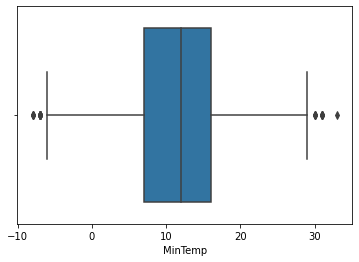

In [26]:
ax1 = sns.boxplot(x=df['MinTemp'])

In [27]:
df = df[(df['MinTemp']>-6) & (df['MinTemp']<29)]         ##MinTemp
print(df['MinTemp'].unique())
df


[13  7 12  9 17 14 15  8 11 20 16 19 10 18 24 21 22 28 23  3  6  5  4  2
  1 -2 -1  0 25 26 -3 27 -4 -5]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


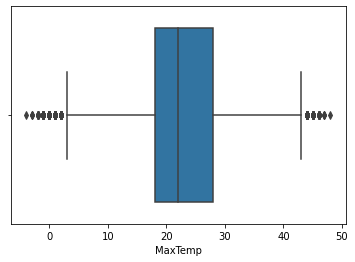

In [28]:
##MaxTemp



ax2 = sns.boxplot(x=df['MaxTemp'])

In [29]:
df = df[(df['MaxTemp']>3) & (df['MaxTemp']<43)]
print(df['MaxTemp'].unique())
df

[22 25 28 32 29 26 31 30 21 18 24 27 20 33 23 34 35 37 38 36 39 40 41 42
 19 16 15 12 11 14 17 13 10  8  9  6  7  4  5]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


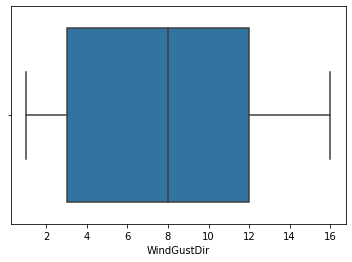

In [30]:
ax3 = sns.boxplot(x=df['WindGustDir'])    #no outliers # WindGustDir

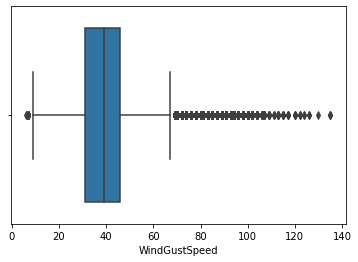

In [31]:
ax4 = sns.boxplot(x=df['WindGustSpeed'])        # 'WindGustSpeed

In [32]:
df = df[(df['WindGustSpeed']>10) & (df['WindGustSpeed']<65)]
print(df['WindGustSpeed'].unique())
df

[44 46 24 41 56 50 35 28 30 31 61 40 22 63 43 26 33 57 48 39 37 52 54 17
 20 19 15 13 11 59]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


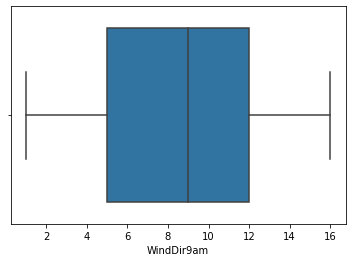

In [33]:
ax5 = sns.boxplot(x=df['WindDir9am'])           ### No outliers for WindDir9am

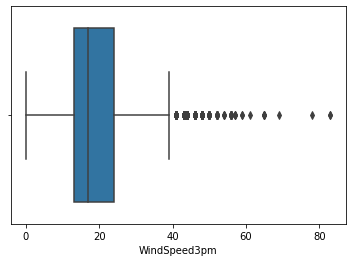

In [34]:
ax6 = sns.boxplot(x=df['WindSpeed3pm'])        # WindSpeed3pm

In [35]:
df = df[(df['WindSpeed3pm']<40)]
print(df['WindSpeed3pm'].unique())
df

[24 22 26  9 20 17 11  6 13 28 30 19 31  7 15  4  0  2 18 33 37 35 39]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


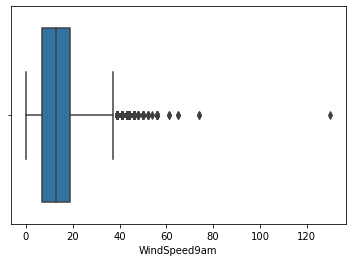

In [36]:
ax7 = sns.boxplot(x=df['WindSpeed9am'])     #WindSpeed9am

In [37]:
df = df[(df['WindSpeed9am']<28)]
print(df['WindSpeed9am'].unique())
df

[20  4 19 11  7  6 15 17 24 14  9  0 13  2 26 22]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


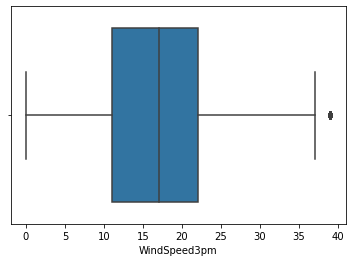

In [38]:
ax8 = sns.boxplot(x=df['WindSpeed3pm'])             #WindSpeed3pm

In [39]:
df = df[(df['WindSpeed3pm']<31)]
print(df['WindSpeed3pm'].unique())
df

[24 22 26  9 20 17 11  6 13 30 19  7 15 28  4  0  2 18]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


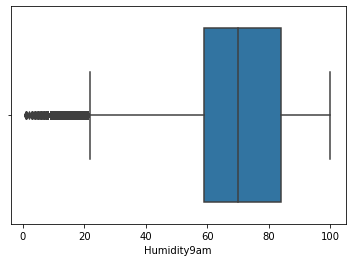

In [40]:
ax9 = sns.boxplot(x=df['Humidity9am'])        #'Humidity9am'

In [41]:
df = df[(df['Humidity9am']>20)]
print(df['Humidity9am'].unique())
df

[ 71  44  38  45  82  55  49  48  58  89  65  57  50  69  80  47  56  54
  41  78  43  33  34  36  52  51  35  39  37  32  53  66  46  63  62  76
  87  60  61  59  72  67  75  88  68  73  74  83  70  77  81  86  97  99
  91  85  93  92  84  94  79  98  96  95  90  64  42  29 100  40  27  31
  23  26  30  25  24  22  21  28]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


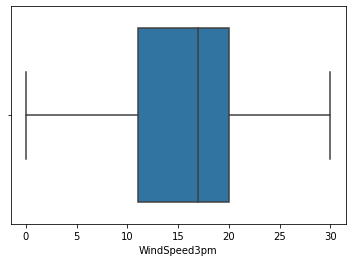

In [42]:
ax10 = sns.boxplot(x=df['WindSpeed3pm'])               #  WindSpeed3pm

In [43]:
df = df[(df['WindSpeed3pm']<31)]
print(df['WindSpeed3pm'].unique())
df

[24 22 26  9 20 17 11  6 13 30 19  7 15 28  4  0  2 18]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


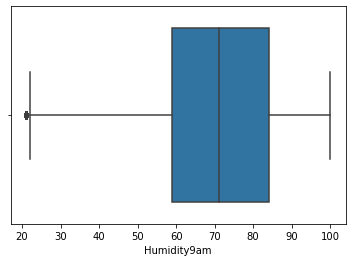

In [44]:
ax11 = sns.boxplot(x=df['Humidity9am'])          ###########################  Humidity9am

In [45]:
df = df[(df['Humidity9am']>25)]
print(df['Humidity9am'].unique())
df

[ 71  44  38  45  82  55  49  48  58  89  65  57  50  69  80  47  56  54
  41  78  43  33  34  36  52  51  35  39  37  32  53  66  46  63  62  76
  87  60  61  59  72  67  75  88  68  73  74  83  70  77  81  86  97  99
  91  85  93  92  84  94  79  98  96  95  90  64  42  29 100  40  27  31
  26  30  28]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


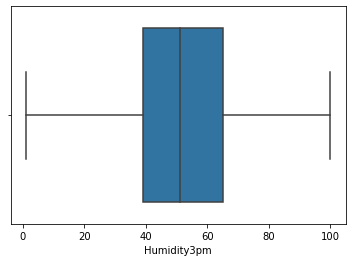

In [46]:
ax12 = sns.boxplot(x=df['Humidity3pm'])             ###########################  Humidity3pm

In [47]:
df = df[(df['Humidity3pm']>1)]
print(df['Humidity3pm'].unique())
df

[ 22  25  30  16  33  23  19  27  91  43  32  28  82  65  26  24  17  15
  70  12   9   8  31  10  21  13  11  69  18  39  14  35  20  90  68  41
  34  78  37  42  47  52  29  86  79  48  46  38  44  49  51  36  45  40
  53  61  59  63  54  57  50  74  58  75  97  80  95  56  72  60  71  73
  81  76  62  64  87  85  67  55  77  84   7  93  99  89  92  66  83  94
  96  88 100  98   6   5   4   2   3]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


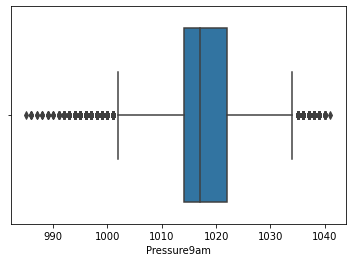

In [48]:
ax13 = sns.boxplot(x=df['Pressure9am'])         ###########################  Pressure9am

In [49]:
df = df[(df['Pressure9am']>1003) & (df['Pressure9am']<1035)]
print(df['Pressure9am'].unique())
df

[1007 1010 1017 1009 1013 1011 1012 1005 1019 1006 1004 1014 1018 1015
 1008 1016 1023 1022 1021 1020 1026 1027 1024 1025 1028 1029 1031 1030
 1034 1032 1033]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


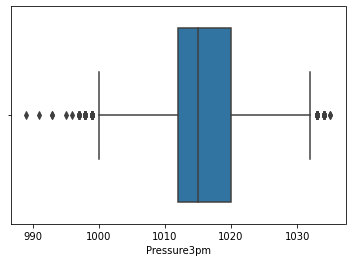

In [50]:
ax14 = sns.boxplot(x=df['Pressure3pm'])            # Pressure3pm

In [51]:
df = df[(df['Pressure3pm']>1000) & (df['Pressure3pm']<1033)]
print(df['Pressure3pm'].unique())
df

[1007 1008 1012 1006 1005 1010 1004 1002 1009 1017 1014 1003 1001 1013
 1016 1011 1019 1015 1018 1020 1023 1021 1024 1025 1027 1028 1022 1029
 1026 1030 1031 1032]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


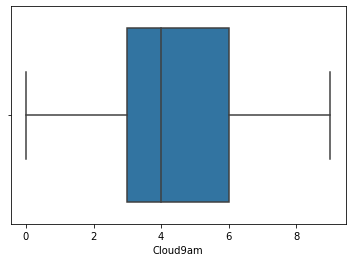

In [52]:
ax15 = sns.boxplot(x=df['Cloud9am'])

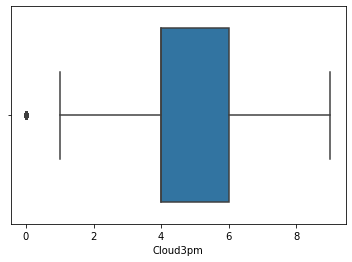

In [53]:
ax16 = sns.boxplot(x=df['Cloud3pm'])          # Cloud3pm



In [54]:
df = df[(df['Cloud3pm']>1)]
print(df['Cloud3pm'].unique())
df

[4 2 8 7 6 3 5 9]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


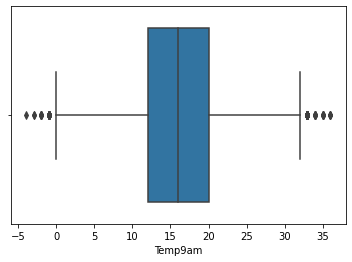

In [55]:
ax17 = sns.boxplot(x=df['Temp9am'])             # Temp9am

In [56]:
df = df[(df['Temp9am']>-1) & (df['Temp9am']<34)]
print(df['Temp9am'].unique())
df

[16 17 21 18 20 15 19 23 24 12 14 22 25 27 26 28 29 13  9 11  7  8 10  4
  6  1  5  2  3  0 32 30 31 33]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


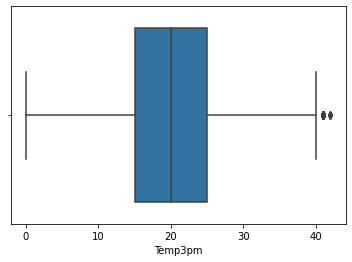

In [57]:
ax18 = sns.boxplot(x=df['Temp3pm'])          #Temp3pm


In [58]:
df = df[(df['Temp3pm']>1) & (df['Temp3pm']<41)]
print(df['Temp3pm'].unique())
df

[21 24 23 26 29 28 25 17 27 30 31 32 18 22 33 34 36 38 35 37 39 40 20 19
 15  9 12 16 14 13 10 11  7  8  6  5  3  4  2]


,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


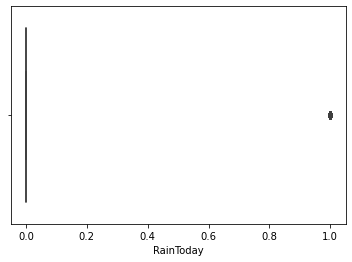

In [59]:
ax19 = sns.boxplot(x=df['RainToday'])


# prePROCESSING with Standardization

In [60]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13,22,1,44,1,1,20,24,71,22,1007,1007,8,4,16,21,0,0
1,7,25,2,44,2,2,4,22,44,25,1010,1007,4,4,17,24,0,0
2,12,25,3,46,1,2,19,26,38,30,1007,1008,4,2,21,23,0,0
3,9,28,4,24,3,3,11,9,45,16,1017,1012,4,4,18,26,0,0
4,17,32,1,41,4,4,7,20,82,33,1010,1006,7,8,17,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2,23,15,31,3,8,13,11,51,24,1024,1020,4,4,10,22,0,0
145456,3,25,5,22,3,13,13,9,56,21,1023,1019,4,4,10,24,0,0
145457,5,26,6,37,3,1,9,9,53,24,1021,1016,4,4,12,26,0,0
145458,7,27,13,28,6,13,13,7,51,24,1019,1016,3,2,15,26,0,0


<AxesSubplot:>

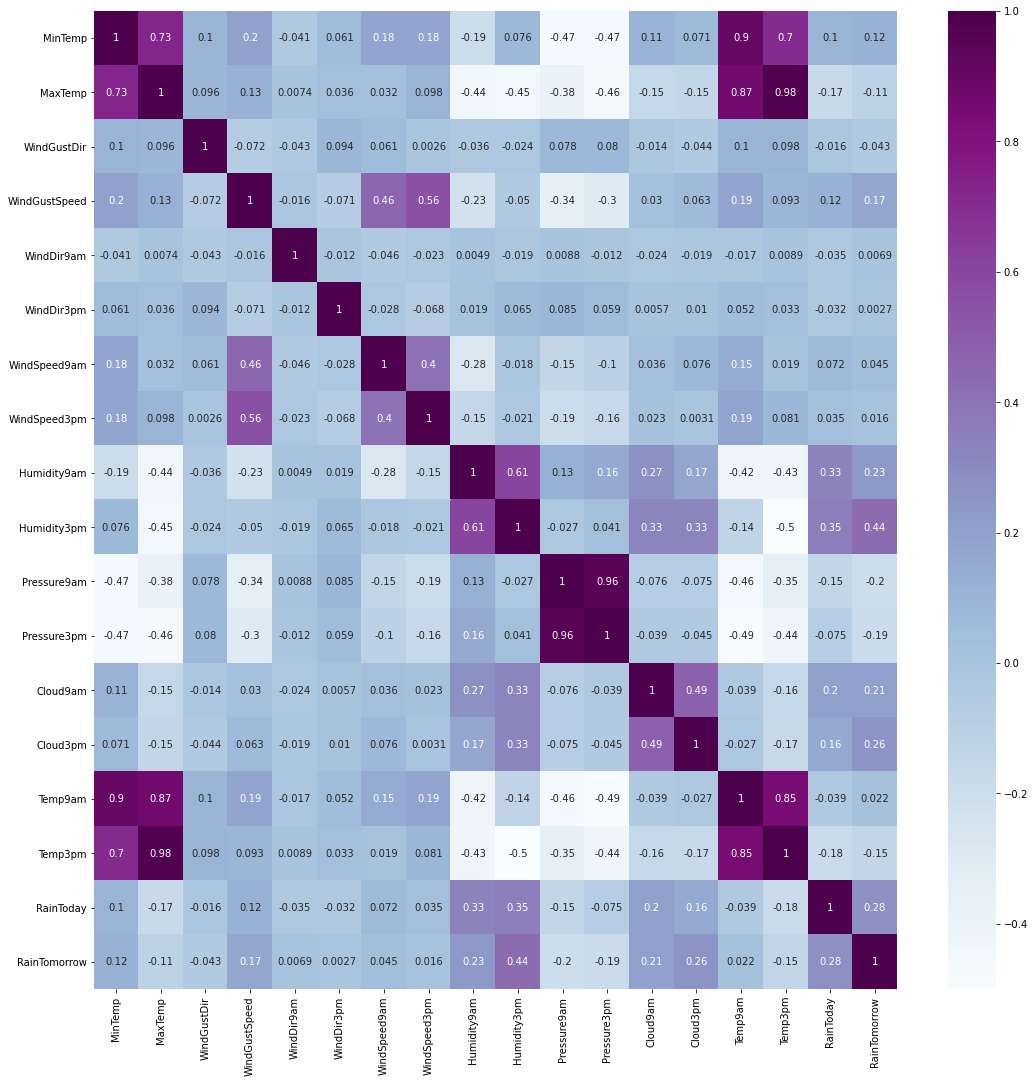

In [61]:
# Correlation map for numeric attributes
plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),cmap="BuPu",annot=True)

# Standardization for all the numeric columns

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
X = df[['MinTemp',
 'MaxTemp',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']]
y = df['RainTomorrow']

In [64]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

In [65]:
#Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables 
#or features of data. It basically helps to normalise the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [66]:
X_train

array([[ 0.2566832 , -0.18097096,  0.17381462, ..., -0.15525284,
        -0.11275154, -0.54019384],
       [ 2.6447399 ,  1.48737294, -1.27126258, ...,  2.11543219,
         1.43720155, -0.54019384],
       [-0.53933569,  0.42569955,  0.17381462, ..., -0.6418282 ,
         0.662225  , -0.54019384],
       ...,
       [ 1.37110966,  0.27403192,  0.99957301, ...,  0.98008968,
        -0.26774685, -0.54019384],
       [-0.22092814, -0.48430622, -1.27126258, ...,  0.00693895,
        -0.57773747, -0.54019384],
       [-1.65376215, -0.02930334, -1.47770218, ..., -0.96621178,
         0.19723907, -0.54019384]])

In [69]:
nameOfClassifiers=[]
Accuracy=[]

In [73]:
#Support Vector Classifier

from sklearn.svm import SVC
SVC = SVC(kernel='rbf', gamma='auto', max_iter=-1).fit(X_train, y_train)
SVC.score(X_test, y_test)
print("The accuracy of Support Vector Classifier Model is {:.2f}".format(SVC.score(X_test, y_test)))

nameOfClassifiers.append("Support Vector Classifier")
Accuracy.append(SVC.score(X_test, y_test))

The accuracy of Support Vector Classifier Model is 0.84


In [75]:
#MLP Classifier

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=20, max_iter=100000, hidden_layer_sizes=30, activation='tanh',learning_rate= 'adaptive').fit(X_train, y_train)
mlp.score(X_test, y_test)
print("The accuracy of MLP Classifier Model is {:.2f}".format(SVC.score(X_test, y_test)))


nameOfClassifiers.append("MLP Classifier")
Accuracy.append(mlp.score(X_test, y_test))

The accuracy of MLP Classifier Model is 0.84


In [76]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, random_state=105).fit(X_train, y_train)
rf.score(X_test, y_test)
print("The accuracy of Random Forest Classifier Model is {:.2f}".format(SVC.score(X_test, y_test)))

nameOfClassifiers.append("Random Forest Classifier")
Accuracy.append(rf.score(X_test, y_test))

The accuracy of Random Forest Classifier Model is 0.84


# Different Model Scores

Accuracy score for different models


<BarContainer object of 5 artists>

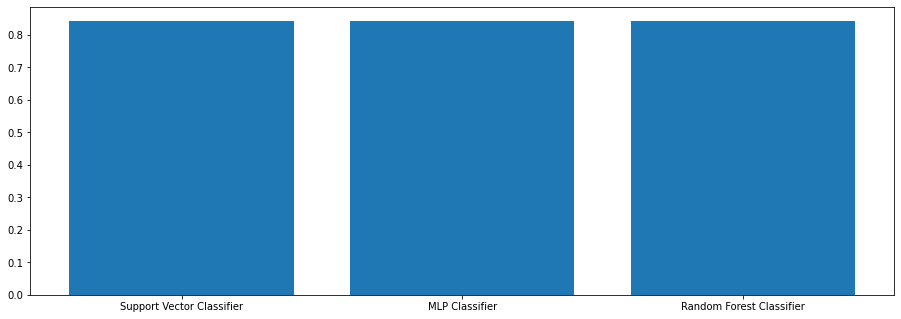

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
print("Accuracy score for different models")
y_pos = range(len(nameOfClassifiers))
ax.bar(nameOfClassifiers,Accuracy)